In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bilashproshad","key":"04fc0624f43455ef2a87747ce8b81000"}'}

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets list

ref                                                           title                                              size  lastUpdated          downloadCount  
------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                   Reddit Vaccine Myths                              233KB  2021-07-03 10:55:28           8738  
crowww/a-large-scale-fish-dataset                             A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           5342  
imsparsh/musicnet-dataset                                     MusicNet Dataset                                   22GB  2021-02-18 14:12:19           1893  
dhruvildave/wikibooks-dataset                                 Wikibooks Dataset                                   2GB  2021-07-03 18:37:20           2336  
promptcloud/careerbuilder-job-listing-2020                    Ca

In [7]:
!kaggle datasets download -d grassknoted/asl-alphabet

 99% 1.02G/1.03G [00:05<00:00, 237MB/s]
100% 1.03G/1.03G [00:05<00:00, 206MB/s]


In [ ]:
!unzip asl-alphabet.zip

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.model_selection import train_test_split
import os
import numpy as np
import matplotlib.pyplot as plt

# ignore information messgaes from tensorflow, but we will receieve error messages
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

In [2]:
gpu_device = tf.config.experimental.list_physical_devices('GPU')
print(f"Number of GPU = {len(gpu_device)}")
tf.config.experimental.set_memory_growth(gpu_device[0], True)

Number of GPU = 1


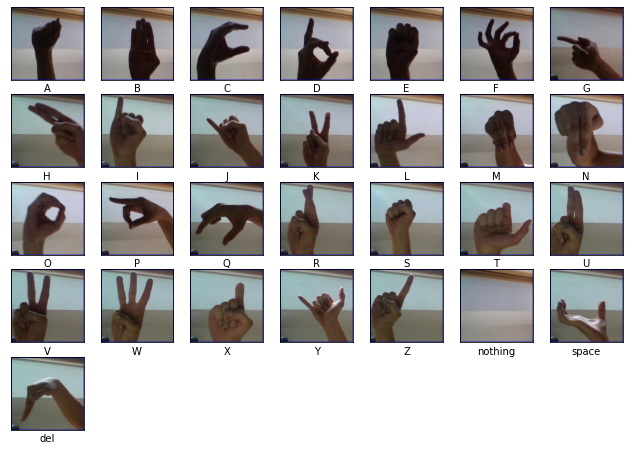

In [6]:
train_dir = 'content/asl_alphabet_train/asl_alphabet_train'
test_dir = 'content/asl_alphabet_test/asl_alphabet_test'
classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 
           'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 
           'W', 'X', 'Y', 'Z', 'nothing', 'space', 'del']
plt.figure(figsize=(11, 11))
for i in range (0,29):
    plt.subplot(7,7,i+1)
    plt.xticks([])
    plt.yticks([])
    path = train_dir + "/{0}/{0}1.jpg".format(classes[i])
    img = plt.imread(path)
    plt.imshow(img)
    plt.xlabel(classes[i])

In [7]:
from time import time
import cv2
from tensorflow.keras import utils
images = []
labels = []
size = 32,32
index = -1
for folder in os.listdir(train_dir):
    index +=1
    for image in os.listdir(train_dir + "/" + folder):
        temp_img = cv2.imread(train_dir + '/' + folder + '/' + image)
        temp_img = cv2.resize(temp_img, size)
        images.append(temp_img)
        labels.append(index)

images = np.array(images)
images = images.astype('float32')/255.0
labels = utils.to_categorical(labels)
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.1)

print(f"X_train= {x_train.shape} Y_train= {y_train.shape}")
print(f"X_test= {x_test.shape} Y_test= {x_test.shape}")

X_train= (78300, 32, 32, 3) Y_train= (78300, 29)
X_test= (8700, 32, 32, 3) Y_test= (8700, 32, 32, 3)


In [8]:
model = keras.Sequential([

    layers.Conv2D(input_shape=(32,32,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"),
    layers.Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"),
    layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),

    layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
    layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
    layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),

    layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),

    layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),

    layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
    
    layers.Flatten(),
    layers.Dense(units=4096,activation="relu"),
    layers.Dense(units=4096,activation="relu"),        
    layers.Dense(units=29, activation="softmax")
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 256)         2

In [9]:
classes = 29
lr = 0.0001
adam = Adam(learning_rate=lr)
model.compile(
    optimizer=adam, 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [10]:
h = model.fit(x_train, y_train, batch_size=128, epochs=5, validation_split=0.1, shuffle = True, verbose=1)

Epoch 1/5
551/551 [==============================] - 97s 146ms/step - loss: 2.3539 - accuracy: 0.2302 - val_loss: 1.2532 - val_accuracy: 0.5593
Epoch 2/5
551/551 [==============================] - 80s 144ms/step - loss: 0.8440 - accuracy: 0.6902 - val_loss: 0.5131 - val_accuracy: 0.8063
Epoch 3/5
551/551 [==============================] - 81s 146ms/step - loss: 0.3610 - accuracy: 0.8689 - val_loss: 0.2490 - val_accuracy: 0.9129
Epoch 4/5
551/551 [==============================] - 83s 151ms/step - loss: 0.1823 - accuracy: 0.9370 - val_loss: 0.1492 - val_accuracy: 0.9510
Epoch 5/5
551/551 [==============================] - 85s 154ms/step - loss: 0.1017 - accuracy: 0.9650 - val_loss: 0.0636 - val_accuracy: 0.9794


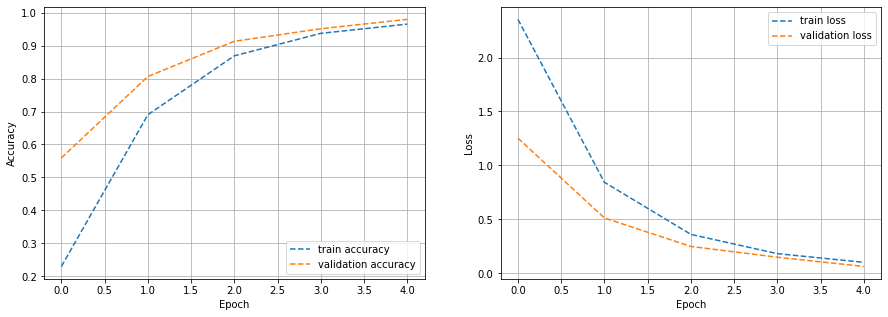

In [11]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--', label='train accuracy')
plt.plot(h.history['val_accuracy'], '--', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--', label='train loss')
plt.plot(h.history['val_loss'], '--', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [12]:

test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

272/272 [==============================] - 7s 22ms/step - loss: 0.0713 - accuracy: 0.9766
Test accuracy: 0.9765517115592957
Test loss: 0.07125280052423477
